<a href="https://colab.research.google.com/github/foqiashahid112/Gale-Shapley/blob/main/Gale_Shapley_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project : **Implementation of Gale-Shapley Algorithm**

By Foqia Shahid and Rafael Jovel

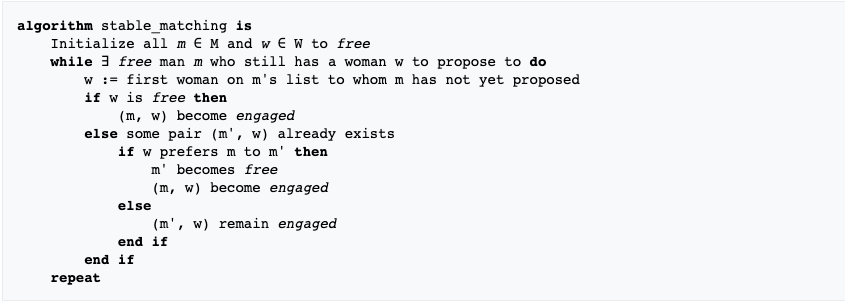

Source: https://en.wikipedia.org/wiki/Gale%E2%80%93Shapley_algorithm

In [ ]:
#https://en.wikipedia.org/wiki/Gale%E2%80%93Shapley_algorithm
#following wikipedia algoithm outline noted above


#N = #number of women, men and pairs
#men = List of Men in order that matched mpreferences
#mpreferences = List of Male Preferences for the women where each row corresponds to one male
#women = List of women in order that matches wpreferences
#wpreferences = List of Female Preferences for the men where each row corresponds to one woman

#Note: the proposing group is the men. to change this, just swap the men and women lists
def gale_shapley(N, men,mpreferences, women, wpreferences):
  pairs =list(range(N)) #  women pairing for each men (corresponding to men list)
  #Initialize all men and women to be free
  mFree = []  #List to keep track of free men
  wFree = []  #List to keep track of free women
  Proposed = []  #number of women proposed to for each of the men (initialised to 0 for each)
  for i in range(N):
    mFree.append(True) #all men are free initially
    wFree.append(True) #all women are free initially
    Proposed.append(0) #no proposals yet

  freeM_index = 0;     #index keeps tract of a Free Man (initialised to 0)
  w_index = 0          #w_index will keep track of the index of the woman being considered for pairing
  while mFree[freeM_index] == True and Proposed[freeM_index] < N: #while there is a free man m who still has a women w to propose to do
    prop = nProposed(Proposed, freeM_index)   #Keeps track of proposals for current man
    w = mpreferences[freeM_index][prop]       #w:= first women  on m's list to whom m has NOT YET proposed
    w_index = findindex_wFree(women,w)        #determine index of w in the wFree list
    if wFree[w_index] == True:                #if w is free
      pairs[freeM_index]= w                   #then (m,w) become engaged
      mFree[freeM_index] = False              #man m is now engaged
      wFree[w_index] = False                  #woman w is also engaged
      Proposed[freeM_index] +=1               #m has proposed!
    else: #some pair (m',w) already exists i.e. wFree[w_index] == False
      m_row = []
      m_row = wpreferences[w_index]           #male preferences in wpreferecences for w
      m = findm(men, freeM_index)              #Returns man
      m_current = m_row.index(m)              #index of mcurrent in m_row (row w_index in wpreferences)
      m_other_inpairs = pairs.index(w)        #find index of w in pairs
      m_ = findm(men, m_other_inpairs)
      m_other = m_row.index(m_)               # index of m_other in m_row (row w_index in wpreferences)

      if wPrefers(m_current, m_other) == True:#w prefers m (this offer) to m'(other offer) then
        index_in_pairs_m_other = findindex_mFree(men, m_)
        mFree[index_in_pairs_m_other] = True #m' is no longer engaged
        pairs[freeM_index]= w                #(m, w) become engaged if w prefers m over m'
        mFree[freeM_index] = False           #man m is now engaged
        wFree[w_index] = False               #woman w is now engaged as well
        Proposed[freeM_index] +=1            #m has proposed!
      else:
        Proposed[freeM_index] +=1            #m had proposed! (rejected)
        continue                             #skip last step as we dont want to move to next man
    freeM_index = (freeM_index + 1)% N;      #this man is now engaged so move onto next man
    if(mFree[freeM_index] == False):
      freeM_index = (freeM_index + 1)% N; #this man is now engaged so move onto next FREE man
  print(pairs)
      

#Below are some helper methods
#Gives the number of proposals for man at Proposed[index]
def nProposed(Proposed, index):
  return Proposed[index]
  

#Determines index of w in the wFree list
def findindex_wFree(women, w):
  return women.index(w)


#Determines index of m in the mFree list
def findindex_mFree(men, m):
  return men.index(m)

#Checks to see if the woman w prefers the current offer to the previously accepted offer
#m_current = index of m_current in wpreferences
#m_other = index of m_other in wpreferences
def wPrefers(m_current, m_other):
  if m_current < m_other: #m_current is prefers over m_other
    return True
  else:
    return False

#Tells us who m is given the index
def findm(men, freeM_index):
  return men[freeM_index]


In [ ]:
#Example 1
N = 4 #number of women, men and pairs
men = ["E", "F", "G", "H"]
mpreferences = [["C","B","A","D"], #Male Preferences for the women: E (0),F (1),G (2),H (3)
                ["B","C","A","D"],
                ["C","A","B","D"],
                ["D","A","C","B"]] 

women = ["A", "B", "C", "D"]
wpreferences = [["F","E","H","G"], #Women preferences for the men: A (0),B (1),C (2),D (3)
                ["E","G","F","H"],
                ["G","H","F","E"],
                ["E","F","G","H"]]

gale_shapley(N, men, mpreferences, women,wpreferences) #This will run the algorthm for us assuming that the mens group is the proposing party




['B', 'A', 'C', 'D']


Thus, we have the following pairings:

E -> B

F -> A

G -> C

H -> D

In [ ]:
#Example 2:
N = 5
mpreferences= [["Sara","Zoe","Maddy","Eli", "May"], #Male Preferences for the women: Evan (0), Ali (1), Zach (2), Cody (3), Brian (4)
                ["Maddy","May","Zoe","Sara","Eli"],
                ["Maddy","Sara","Eli","May","Zoe"],
                ["May","Zoe","Sara","Eli","Maddy"],
               ["May","Sara", "Eli", "Zoe", "Maddy"]]
men = ["Evan", "Ali", "Zach", "Cody", "Brian"]
wpreferences = [["Evan","Brian","Cody","Zach","Ali"], #Women preferences for the men: Sara (0), Zoe (1), Maddy (2), Eli (3), May (4)
                ["Brian","Ali","Evan","Cody","Zach"],
                ["Evan","Zach","Ali","Brian","Cody"],
                ["Zach","Ali","Brian","Cody","Evan"],
                ["Ali","Cody","Evan","Zach","Brian"]]
women = ["Sara", "Zoe", "Maddy", "Eli", "May"]

gale_shapley(N, men, mpreferences, women, wpreferences)


['Sara', 'May', 'Maddy', 'Zoe', 'Eli']


Thus, we have the following pairings:

Evan -> Sara

Ali -> May

Zach -> Maddy

Cody -> Zoe

Brian -> Eli